# **PRACTICA CALIFICADA 4**


# **PREGUNTA 2**

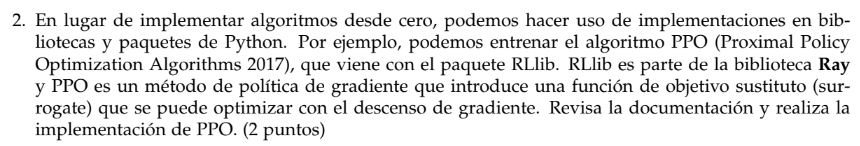

### En las siguientes lineas se entrenará el algoritmo PPO para lograr el objetivo del juego de cartPole de Atari, el cual consiste en mantener una varilla en equilibrio, Un juego completo consiste en 200 episodios, un punto por episodio. Por lo que si obtenemos 200 puntos ganamos el juego . Puede visitar el siguiente link https://gym.openai.com/envs/CartPole-v1/ para mas informacióón del juego.

In [2]:
!pip install ray

In [3]:
import gym
import numpy as np
from matplotlib import pyplot as plt
env = gym.make('CartPole-v0')
import gym
import ray
from ray.rllib.agents.ppo import PPOTrainer, DEFAULT_CONFIG   # importando algoritmo PPO de la libreria ray

/usr/local/lib/python3.7/dist-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)
lz4 not available, disabling sample compression. This will significantly impact RLlib performance. To install lz4, run `pip install lz4`.


In [4]:
!apt-get install -y xvfb x11-utils &> /dev/null
!pip install pyvirtualdisplay==0.2.*  PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.* &> /dev/null
!pip install gym[box2d]==0.17.* &> /dev/null
!sudo apt-get update  &> /dev/null 
!sudo apt-get install xvfb --fix-missing &> /dev/null
import pyvirtualdisplay
_display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
_ = _display.start()
!echo $DISPLAY 
from IPython import display

:1005


In [ ]:
ray.init()

## Implementación de PPO 

In [6]:
config = DEFAULT_CONFIG.copy()
config["num_gpus"] = 1 # in order to use the GPU

agent = PPOTrainer(config, 'CartPole-v0')  # Instanciando nuestro agente con algoritmo PPO.

2021-07-14 20:19:33,627	INFO logger.py:180 -- pip install 'ray[tune]' to see TensorBoard files.
2021-07-14 20:19:33,629	WARNING logger.py:317 -- Could not instantiate TBXLogger: No module named 'tensorboardX'.
2021-07-14 20:19:33,632	INFO trainer.py:671 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-07-14 20:19:33,637	INFO trainer.py:698 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=4738) 2021-07-14 20:19:38,689	WARNING compression.py:16 -- lz4 not available, disabling sample compression. This will significantly impact RLlib performance. To install lz4, run `pip install lz4`.
(pid=4739) 2021-07-14 20:19:38,695	WARNING compression.py:16 -- lz4 not available, disabling sample compression. This will significantly impact RLlib performance. To install lz4, run `pip install lz4`.
2021-07-14 20:19:44,489	INFO trainable.py:104 -- Trainable.setup took 10.859 seconds. If your traina

In [7]:
print(DEFAULT_CONFIG)

{'num_workers': 2, 'num_envs_per_worker': 1, 'create_env_on_driver': False, 'rollout_fragment_length': 200, 'batch_mode': 'truncate_episodes', 'train_batch_size': 4000, 'model': {'_use_default_native_models': False, 'fcnet_hiddens': [256, 256], 'fcnet_activation': 'tanh', 'conv_filters': None, 'conv_activation': 'relu', 'post_fcnet_hiddens': [], 'post_fcnet_activation': 'relu', 'free_log_std': False, 'no_final_linear': False, 'vf_share_layers': False, 'use_lstm': False, 'max_seq_len': 20, 'lstm_cell_size': 256, 'lstm_use_prev_action': False, 'lstm_use_prev_reward': False, '_time_major': False, 'use_attention': False, 'attention_num_transformer_units': 1, 'attention_dim': 64, 'attention_num_heads': 1, 'attention_head_dim': 32, 'attention_memory_inference': 50, 'attention_memory_training': 50, 'attention_position_wise_mlp_dim': 32, 'attention_init_gru_gate_bias': 2.0, 'attention_use_n_prev_actions': 0, 'attention_use_n_prev_rewards': 0, 'num_framestacks': 'auto', 'dim': 84, 'grayscale': 

Reward: 18.0


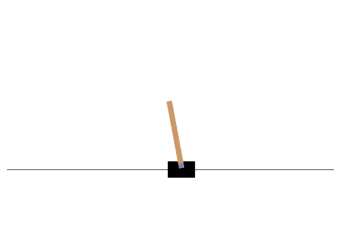

In [8]:
def watch_agent(env):
  state = env.reset()
  rewards = []
  img = plt.imshow(env.render(mode='rgb_array'))
  for t in range(2000):
    action=agent.compute_action(state)

    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)

    state, reward, done, _ = env.step(action)
    rewards.append(reward)
    if done:
        print("Reward:", sum([r for r in rewards]))
        break 
  env.close()

watch_agent(env)
watch_agent(env)

In [9]:
for i in range(20):
  result = agent.train()
  print(f'Mean reward: {result["episode_reward_mean"]:4.1f}')

Mean reward: 21.2
Mean reward: 40.5
Mean reward: 65.8
Mean reward: 92.5
Mean reward: 120.8
Mean reward: 142.9
Mean reward: 166.3
Mean reward: 181.4
Mean reward: 192.7
Mean reward: 195.2
Mean reward: 197.9
Mean reward: 198.7
Mean reward: 199.4
Mean reward: 199.4
Mean reward: 199.6
Mean reward: 199.9
Mean reward: 199.9
Mean reward: 199.2
Mean reward: 199.3
Mean reward: 199.3


### **La maxima recompensa que se espera para este juego es de 200, por lo que veremos que lo logra en aproximadamente 20 episodios, aqui el resultado final:**

Reward: 200.0


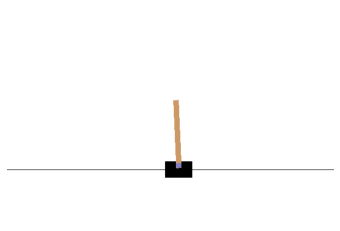

In [12]:
watch_agent(env)

# **PREGUNTA 3**

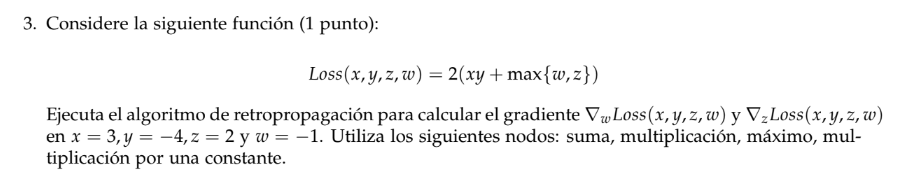

#### Para este ejercicio se ha tomado como base la siguiente pagina https://learnml.today/making-backpropagation-autograd-mnist-classifier-from-scratch-in-Python-5 donde se brinda la mayoria del codigo fuente aqui presentado. Lo que se ha agregado han sido las funciones de maximo y de multiplicacion por una constante en la retropropagación. No se ha usado minitorch por el momento aunque comparte claras similitudes, esta implementación mas bien es una retropropagación de escalares sin construccion de un perceptrón multicapa. Los nodos se han tomado como clases llamadas con un nombre distintivo a la operación que representa y los numeros iniciales, intermedios y finales como clases llamadas Variables.

### **Se ha implementado a modo de dibujo el gráfico computacional de operaciones de nuestra función objetivo. Como se muestra:**

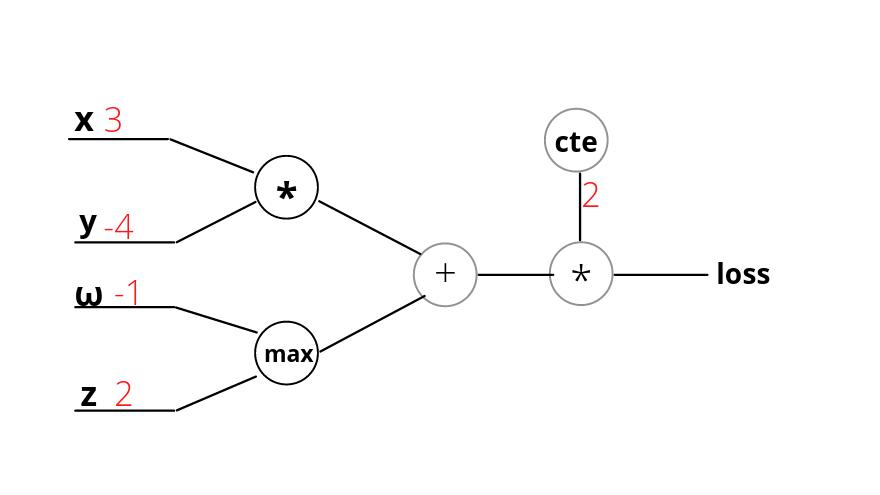

In [13]:
import numpy as np


# A modo de un breve resumen describiré lo que el algoritmo hace:
1. Crea instancias de Variables con dos atributos principales:
          - data : Almacena el valor numérico de la variable inicial,intermedia o final calculada.
          - requires_grad : Este parametro es un booleano que nos permite registrar que variables necesitan 
            retropropagación (True) o no (False). Ni bien una sucesion de derivadas parciales acabe, este parametro 
            cambiará a false. 
1. Crea instancias de Operaciones con dos metodos principales:
          - forward : Calcula las variables numéricas hacia adelante .
          - backward: Nos brinda las derivadas parciales hacia atrás, las cuales usaremos como regla de la cadena,
           ya que el algoritmo realiza un proceso recursivo hacia atras, ni bien llega a la función loss.
            

In [24]:
     class Variable:

            def __init__(self, data, requires_grad=False):
                self.data = data
                if not isinstance(data, np.ndarray):
                    self.data = np.array(data)
                self.requires_grad = requires_grad
                self._grad = None
                self._grad_fn = None

            @property
            def shape(self):
                return self.data.shape

            @property
            def grad_fn(self):
                if not self.requires_grad:
                    raise Exception('Esta variable no se propaga hacia atrás')
                return self._grad_fn

            @property
            def grad(self):
                return self._grad

            def backward(self, grad=None):
                if not self.grad_fn:
                    return False

                elif self.grad is not None:
                    grad = self._grad

                if grad is None and self._grad is None:

                    grad = self.__class__(1., requires_grad=False)

                if not self.requires_grad:
                    raise Exception('Esta variable no se propaga hacia atrás')

                self.grad_fn.backward(grad)
                return True

            def __str__(self):
                return f'Variable({str(self.data)})'

            def add_grad(self, grad):
                if self._grad is None:
                    self._grad = grad
                else:
                    self._grad += grad

            def __add__(self, o): 
                if self.data is not None:
                    self.data += o.data  
                    return self
                self.data = o.data 
                return self

     class Op:       # Especificando la clase prototipo para las Operaciones

            def forward(self):
                raise NotImplemented

            def backward(self, grad):
                raise NotImplemented

            def __call__(self, *args):
                self.out = self.forward(*args)
                self.out._grad_fn = self
                return self.out


     class AddOp(Op): # Implementacióón de la OPeracióón Suma.


            def forward(self, x: Variable, y: Variable):
                self.x = x
                self.y = y

                requires_grad = x.requires_grad or y.requires_grad
                return Variable(x.data + y.data, requires_grad=requires_grad)

            def backward(self, grad):
                if self.x.requires_grad:

                    if self.x.shape != grad.shape:
                        axis = np.argmax(np.abs(np.array(self.x.shape) - 
                                         np.array(grad.shape)))
                        self.x.add_grad(Variable(grad.data.sum(axis=axis, 
                                                        keepdims=True)))
                    else:
                        self.x.add_grad(grad)
                    if self.x.grad_fn:
                        self.x.backward()
                if self.y.requires_grad:
                    if self.y.shape != grad.shape:
                        axis = np.argmax(np.abs(np.array(self.y.shape) - 
                                                np.array(grad.shape)))
                        self.y.add_grad(Variable(grad.data.sum(axis=axis, 
                                                        keepdims=True)))
                    else:
                        self.y.add_grad(grad)
                    if self.y.grad_fn:
                        self.y.backward()


     class MulOp(Op): # Implementación de la Operación Multiplicación.

            def forward(self, x: Variable, y: Variable):
                self.x = x
                self.y = y
                requires_grad = x.requires_grad or y.requires_grad
                return Variable(x.data * y.data, requires_grad=requires_grad)

            def backward(self, grad):
                if self.x.requires_grad:
                    print(self.x, self.x._grad, grad)
                    self.x.add_grad(Variable(grad.data * self.y.data, False))
                    if self.x.grad_fn:
                        self.x.backward()
                if self.y.requires_grad:
                    self.y.add_grad(Variable(grad.data * self.x.data, False))
                    if self.y.grad_fn:
                        self.y.backward()

     class CteOp(Op): # Implementación de la Operación Multiplicación por una constante.

            def forward(self, x: Variable, cte: Variable):
                self.x = x
                self.cte = cte
                requires_grad = x.requires_grad or y.requires_grad
                return Variable(x.data * cte, requires_grad=requires_grad)

            def backward(self, grad):
                if self.x.requires_grad:
                    print(self.x, self.x._grad, grad)
                    self.x.add_grad(Variable(grad.data * self.cte, False))
                    if self.x.grad_fn:
                        self.x.backward()  

     class MaxOp(Op): # Implementacióón de la Operación Máximo de dos números.

            def forward(self, x: Variable, y: Variable):
                self.x = x
                self.y = y
                requires_grad = x.requires_grad or y.requires_grad
                if self.x.data >= self.y.data:
                  return Variable(x.data, requires_grad=requires_grad)
                else:
                  return Variable(y.data, requires_grad=requires_grad)

            def backward(self, grad):
                if self.x.requires_grad and self.x.data >= self.y.data:
                    print(self.x, self.x._grad, grad)
                    self.x.add_grad(Variable(grad.data, False))
                    if self.x.grad_fn:
                        self.x.backward()
                if self.y.requires_grad and self.x.data < self.y.data:
                    self.y.add_grad(Variable(grad.data, False))
                    if self.y.grad_fn:
                        self.y.backward()                           

Caso en el que w es menor que z, como nos pide el ejercicio, no deberia haber un gradiente de w debido a la funcion max. Es decir, sería como calcular el gradiente de loss=2(xy+z). He verificado minuciosamente que el algoritmo de los gradientes correctos.

In [29]:
        # INGRESANDO LAS ENTRADAS
        _x = Variable(3,requires_grad=True)
        _y = Variable(-4,requires_grad=True)
        _w = Variable(-1,requires_grad=True)
        _z = Variable(2,requires_grad=True)
        
        loss = CteOp()(AddOp()( MulOp()(_x, _y), MaxOp()(_w,_z)),2)  # ESPECIFICAMOS CUAL ES NUESTRA FUNCIÓÓN LOSS.
        loss.backward()
        print()
        print('Forward completo hacia salida = ', loss)
        print()
        print('gradiente x de loss  = ',_x.grad)
        print()
        print('gradiente y de loss = ',_y.grad) 
        print()
        print('gradiente w de loss = ',_w.grad)  # lo que nos pide el problema
        print()
        print('gradiente z de loss = ',_z.grad)  # lo que nos pide el problema
        print()

Variable(-10) None Variable(1.0)
Variable(3) None Variable(2.0)

Forward completo hacia salida =  Variable(-20)

gradiente x de loss  =  Variable(-8.0)

gradiente y de loss =  Variable(6.0)

gradiente w de loss =  None

gradiente z de loss =  Variable(2.0)



Caso en el que w es mayor que z, colocamos un ejemplo adicional, no deberia haber un gradiente de z debido a la funcion max.seria como calcular el gradiente de loss=2(xy+w). He verificado minuciosamente que el algoritmo de los gradientes correctos.

In [32]:
        # INGRESANDO LAS ENTRADAS
        _x = Variable(5,requires_grad=True)
        _y = Variable(-2,requires_grad=True)
        _w = Variable(3,requires_grad=True)
        _z = Variable(1,requires_grad=True)
        
        loss = CteOp()(AddOp()( MulOp()(_x, _y), MaxOp()(_w,_z)),2)   # ESPECIFICAMOS CUAL ES NUESTRA FUNCIÓÓN LOSS.
        loss.backward()
        print()
        print('Forward completo hacia salida = ', loss)
        print()
        print('gradiente x de loss  = ',_x.grad)
        print()
        print('gradiente y de loss = ',_y.grad) 
        print()
        print('gradiente w de loss = ',_w.grad) 
        print()
        print('gradiente z de loss = ',_z.grad) 
        print()

Variable(-7) None Variable(1.0)
Variable(5) None Variable(2.0)
Variable(3) None Variable(2.0)

Forward completo hacia salida =  Variable(-14)

gradiente x de loss  =  Variable(-4.0)

gradiente y de loss =  Variable(10.0)

gradiente w de loss =  Variable(2.0)

gradiente z de loss =  None



# **PREGUNTA 7**

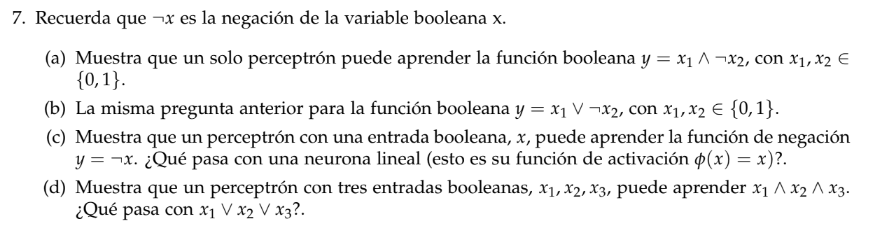

#### **En lo que conscierne a esta solución, se resolverá con el perceptrón (no simple) nativo del perceptron multicapa.**

In [2]:
import torch
from torch.autograd import Variable
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch.nn.functional as F
from torch import nn, optim

### **item a) y = x1 ∧ ¬x2**

Creamos los tensores con el input y output correcto:




In [3]:
X = torch.Tensor([[0., 0.],[0., 1.],[1., 0.],[1., 1.]])
y = torch.Tensor([0., 0., 1., 0.])

In [4]:
class Net(nn.Module):

  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 1)  # Conectamos las entradas de la red a un solo perceptrón.


  def forward(self, x):
    return torch.sigmoid(self.fc1(x))   # el perceptrón tiene función de activación sigmoide.


In [5]:
red_2_entradas = Net(2)  # Instanciamos la red con solo dos entradas (x1 y x2)

In [6]:
criterion = nn.BCELoss()
optimizador = optim.Adam(red_2_entradas.parameters(), lr=0.001)

In [7]:


def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

for epoch in range(25000):
    
    y_pred = red_2_entradas(X)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y)
    
    if epoch % 1000 == 0:
      print(
f'''Epoca {epoch}
Conjunto de entrenamiento - perdida: {round_tensor(train_loss)}''')
    
    optimizador.zero_grad()
    train_loss.backward()
    optimizador.step()



Epoca 0
Conjunto de entrenamiento - perdida: 1.071
Epoca 1000
Conjunto de entrenamiento - perdida: 0.548
Epoca 2000
Conjunto de entrenamiento - perdida: 0.37
Epoca 3000
Conjunto de entrenamiento - perdida: 0.263
Epoca 4000
Conjunto de entrenamiento - perdida: 0.192
Epoca 5000
Conjunto de entrenamiento - perdida: 0.141
Epoca 6000
Conjunto de entrenamiento - perdida: 0.103
Epoca 7000
Conjunto de entrenamiento - perdida: 0.075
Epoca 8000
Conjunto de entrenamiento - perdida: 0.055
Epoca 9000
Conjunto de entrenamiento - perdida: 0.04
Epoca 10000
Conjunto de entrenamiento - perdida: 0.029
Epoca 11000
Conjunto de entrenamiento - perdida: 0.021
Epoca 12000
Conjunto de entrenamiento - perdida: 0.015
Epoca 13000
Conjunto de entrenamiento - perdida: 0.011
Epoca 14000
Conjunto de entrenamiento - perdida: 0.008
Epoca 15000
Conjunto de entrenamiento - perdida: 0.006
Epoca 16000
Conjunto de entrenamiento - perdida: 0.004
Epoca 17000
Conjunto de entrenamiento - perdida: 0.003
Epoca 18000
Conjunto de e

In [8]:
output1 = red_2_entradas(torch.tensor([0., 0.]))
print(output1.round())  # 0
output2 = red_2_entradas(torch.tensor([0., 1.]))
print(output2.round())  # 0
output3 = red_2_entradas(torch.tensor([1., 0.]))
print(output3.round())  # 1
output4 = red_2_entradas(torch.tensor([1., 1.]))
print(output4.round())  # 0

tensor([0.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)


### **item b) y = x1 ∨ ¬x2**

Creamos los tensores con el input y output correcto:

In [9]:
X = torch.Tensor([[0., 0.],[0., 1.],[1., 0.],[1., 1.]])
y = torch.Tensor([1., 0., 1., 1.])

In [10]:

def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

for epoch in range(25000):
    
    y_pred = red_2_entradas(X)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y)
    
    if epoch % 1000 == 0:
      print(
f'''Epoca {epoch}
Conjunto de entrenamiento - perdida: {round_tensor(train_loss)}''')
    
    optimizador.zero_grad()
    train_loss.backward()
    optimizador.step()

Epoca 0
Conjunto de entrenamiento - perdida: 4.147
Epoca 1000
Conjunto de entrenamiento - perdida: 2.203
Epoca 2000
Conjunto de entrenamiento - perdida: 1.527
Epoca 3000
Conjunto de entrenamiento - perdida: 1.245
Epoca 4000
Conjunto de entrenamiento - perdida: 1.017
Epoca 5000
Conjunto de entrenamiento - perdida: 0.792
Epoca 6000
Conjunto de entrenamiento - perdida: 0.575
Epoca 7000
Conjunto de entrenamiento - perdida: 0.383
Epoca 8000
Conjunto de entrenamiento - perdida: 0.235
Epoca 9000
Conjunto de entrenamiento - perdida: 0.139
Epoca 10000
Conjunto de entrenamiento - perdida: 0.082
Epoca 11000
Conjunto de entrenamiento - perdida: 0.049
Epoca 12000
Conjunto de entrenamiento - perdida: 0.03
Epoca 13000
Conjunto de entrenamiento - perdida: 0.019
Epoca 14000
Conjunto de entrenamiento - perdida: 0.012
Epoca 15000
Conjunto de entrenamiento - perdida: 0.008
Epoca 16000
Conjunto de entrenamiento - perdida: 0.005
Epoca 17000
Conjunto de entrenamiento - perdida: 0.003
Epoca 18000
Conjunto de 

In [11]:
output1 = red_2_entradas(torch.tensor([0., 0.]))
print(output1.round())  # 1
output2 = red_2_entradas(torch.tensor([0., 1.]))
print(output2.round())  # 0
output3 = red_2_entradas(torch.tensor([1., 0.]))
print(output3.round())  # 1
output4 = red_2_entradas(torch.tensor([1., 1.]))
print(output4.round())  # 1

tensor([1.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)


### **PRUEBA ADICIONAL: ¿Qué pasa con XOR?.**

Ya que XOR no es separable linealmente, entonces el aprendizaje debe estancarse, como lo demostramos a continuacióón:

In [14]:
X = torch.Tensor([[0., 0.],[0., 1.],[1., 0.],[1., 1.]])
y = torch.Tensor([0., 1., 1., 0.])

In [15]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

for epoch in range(25000):
    
    y_pred = red_2_entradas(X)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y)
    
    if epoch % 1000 == 0:
      print(
f'''Epoca {epoch}
Conjunto de entrenamiento - perdida: {round_tensor(train_loss)}''')
    
    optimizador.zero_grad()
    train_loss.backward()
    optimizador.step()

Epoca 0
Conjunto de entrenamiento - perdida: 0.693
Epoca 1000
Conjunto de entrenamiento - perdida: 0.693
Epoca 2000
Conjunto de entrenamiento - perdida: 0.693
Epoca 3000
Conjunto de entrenamiento - perdida: 0.693
Epoca 4000
Conjunto de entrenamiento - perdida: 0.693
Epoca 5000
Conjunto de entrenamiento - perdida: 0.693
Epoca 6000
Conjunto de entrenamiento - perdida: 0.693
Epoca 7000
Conjunto de entrenamiento - perdida: 0.693
Epoca 8000
Conjunto de entrenamiento - perdida: 0.693
Epoca 9000
Conjunto de entrenamiento - perdida: 0.693
Epoca 10000
Conjunto de entrenamiento - perdida: 0.693
Epoca 11000
Conjunto de entrenamiento - perdida: 0.693
Epoca 12000
Conjunto de entrenamiento - perdida: 0.693
Epoca 13000
Conjunto de entrenamiento - perdida: 0.693
Epoca 14000
Conjunto de entrenamiento - perdida: 0.693
Epoca 15000
Conjunto de entrenamiento - perdida: 0.693
Epoca 16000
Conjunto de entrenamiento - perdida: 0.693
Epoca 17000
Conjunto de entrenamiento - perdida: 0.693
Epoca 18000
Conjunto de

### **item c) y = ¬x**




Recordemos que la funcióón Linear tiene como parametro por defecto a Bias=True, por lo que el aprendizaje es posible, para este caso.

In [47]:
class Net(nn.Module):

  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 1)  # Conectamos las entradas de la red a un solo perceptrón.


  def forward(self, x):
    return torch.sigmoid(self.fc1(x))   # el perceptrón tiene función de activación sigmoide.

In [48]:
red_1_entrada = Net(1) # Instanciamos la red con solo una entrada x.
optimizador = optim.Adam(red_1_entrada.parameters(), lr=0.001)

In [49]:
X = torch.Tensor([[0.],[1.]])
y = torch.Tensor([1., 0.])

In [50]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

for epoch in range(25000):
    
    y_pred = red_1_entrada(X)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y)
    
    if epoch % 1000 == 0:
      print(
f'''Epoca {epoch}
Conjunto de entrenamiento - perdida: {round_tensor(train_loss)}''')
    
    optimizador.zero_grad()
    train_loss.backward()
    optimizador.step()


Epoca 0
Conjunto de entrenamiento - perdida: 0.324
Epoca 1000
Conjunto de entrenamiento - perdida: 0.193
Epoca 2000
Conjunto de entrenamiento - perdida: 0.118
Epoca 3000
Conjunto de entrenamiento - perdida: 0.071
Epoca 4000
Conjunto de entrenamiento - perdida: 0.044
Epoca 5000
Conjunto de entrenamiento - perdida: 0.027
Epoca 6000
Conjunto de entrenamiento - perdida: 0.017
Epoca 7000
Conjunto de entrenamiento - perdida: 0.011
Epoca 8000
Conjunto de entrenamiento - perdida: 0.007
Epoca 9000
Conjunto de entrenamiento - perdida: 0.005
Epoca 10000
Conjunto de entrenamiento - perdida: 0.003
Epoca 11000
Conjunto de entrenamiento - perdida: 0.002
Epoca 12000
Conjunto de entrenamiento - perdida: 0.001
Epoca 13000
Conjunto de entrenamiento - perdida: 0.001
Epoca 14000
Conjunto de entrenamiento - perdida: 0.001
Epoca 15000
Conjunto de entrenamiento - perdida: 0.0
Epoca 16000
Conjunto de entrenamiento - perdida: 0.0
Epoca 17000
Conjunto de entrenamiento - perdida: 0.0
Epoca 18000
Conjunto de entre

In [51]:
output1 = red_1_entrada(torch.tensor([0.]))
print(output1.round())  # 1
output2 = red_1_entrada(torch.tensor([1.]))
print(output2.round())  # 0

tensor([1.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)


### **Sea y = ¬x. ¿Qué pasa con una neurona lineal (esto es su función de activación φ(x) = x)?.**

Ya que solo se esta teniendo una entrada y una salida, al aplicarle una activación lineal, el valor que sale del perceptrón es igual al valor de la entrada mas el bias, por lo que este ultimo parametro (bias) permitirá aún el aprendizaje.

In [52]:
class Net_lineal(nn.Module):

  def __init__(self, n_features):
    super(Net_lineal, self).__init__()
    self.fc1 = nn.Linear(n_features, 1)  # Conectamos las entradas de la red a un solo perceptrón.


  def forward(self, x):
    return self.fc1(x)   # el perceptrón tiene función de activación lineal.

In [53]:
red_1_entrada_lineal = Net_lineal(1)
optimizador = optim.Adam(red_1_entrada_lineal.parameters(), lr=0.001)
criterion = nn.MSELoss() # cambiamos de criterio, ya que BCELoss esta hecho para activación sigmoide.

In [54]:
X = torch.Tensor([[0.],[1.]])
y = torch.Tensor([1., 0.])

In [55]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

for epoch in range(25000):
    
    y_pred = red_1_entrada_lineal(X)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y)
    
    if epoch % 1000 == 0:
      print(
f'''Epoca {epoch}
Conjunto de entrenamiento - perdida: {round_tensor(train_loss)}''')
    
    optimizador.zero_grad()
    train_loss.backward()
    optimizador.step()


Epoca 0
Conjunto de entrenamiento - perdida: 0.985
Epoca 1000
Conjunto de entrenamiento - perdida: 0.213
Epoca 2000
Conjunto de entrenamiento - perdida: 0.022
Epoca 3000
Conjunto de entrenamiento - perdida: 0.001
Epoca 4000
Conjunto de entrenamiento - perdida: 0.0
Epoca 5000
Conjunto de entrenamiento - perdida: 0.0
Epoca 6000
Conjunto de entrenamiento - perdida: 0.0
Epoca 7000
Conjunto de entrenamiento - perdida: 0.0
Epoca 8000
Conjunto de entrenamiento - perdida: 0.0
Epoca 9000
Conjunto de entrenamiento - perdida: 0.0
Epoca 10000
Conjunto de entrenamiento - perdida: 0.0
Epoca 11000
Conjunto de entrenamiento - perdida: 0.0
Epoca 12000
Conjunto de entrenamiento - perdida: 0.0
Epoca 13000
Conjunto de entrenamiento - perdida: 0.0
Epoca 14000
Conjunto de entrenamiento - perdida: 0.0
Epoca 15000
Conjunto de entrenamiento - perdida: 0.0
Epoca 16000
Conjunto de entrenamiento - perdida: 0.0
Epoca 17000
Conjunto de entrenamiento - perdida: 0.0
Epoca 18000
Conjunto de entrenamiento - perdida: 0.

In [56]:
output1 = red_1_entrada_lineal(torch.tensor([0.]))
print(output1.round())  # 1
output2 = red_1_entrada_lineal(torch.tensor([1.]))
print(output2.round())  # 0

tensor([1.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)


### **item d) Muestra que un perceptrón con tres entradas booleanas, x1, x2, x3, puede aprender x1 ∧ x2 ∧ x3.**

In [26]:
class Net(nn.Module):

  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 1)  # Conectamos las entradas de la red a un solo perceptrón.


  def forward(self, x):
    return torch.sigmoid(self.fc1(x))   # el perceptrón tiene función de activación sigmoide.

In [27]:
red_3_entradas = Net(3)  # Instanciamos la red con solo dos entradas (x1, x2 y x3)

In [28]:
X = torch.Tensor([[0., 0., 0.],[0., 0., 1.],[0., 1., 0.],[0., 1., 1.],[1., 0., 0.],[1., 0., 1.],[1., 1., 0.],[1., 1., 1.]])
y = torch.Tensor([0., 0., 0., 0., 0., 0., 0., 1. ])

In [29]:
criterion = nn.BCELoss()
optimizador = optim.Adam(red_3_entradas.parameters(), lr=0.001)

In [30]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

for epoch in range(25000):
    
    y_pred = red_3_entradas(X)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y)
    
    if epoch % 1000 == 0:
      print(
f'''Epoca {epoch}
Conjunto de entrenamiento - perdida: {round_tensor(train_loss)}''')
    
    optimizador.zero_grad()
    train_loss.backward()
    optimizador.step()

Epoca 0
Conjunto de entrenamiento - perdida: 0.646
Epoca 1000
Conjunto de entrenamiento - perdida: 0.426
Epoca 2000
Conjunto de entrenamiento - perdida: 0.353
Epoca 3000
Conjunto de entrenamiento - perdida: 0.292
Epoca 4000
Conjunto de entrenamiento - perdida: 0.244
Epoca 5000
Conjunto de entrenamiento - perdida: 0.205
Epoca 6000
Conjunto de entrenamiento - perdida: 0.174
Epoca 7000
Conjunto de entrenamiento - perdida: 0.148
Epoca 8000
Conjunto de entrenamiento - perdida: 0.126
Epoca 9000
Conjunto de entrenamiento - perdida: 0.108
Epoca 10000
Conjunto de entrenamiento - perdida: 0.092
Epoca 11000
Conjunto de entrenamiento - perdida: 0.079
Epoca 12000
Conjunto de entrenamiento - perdida: 0.067
Epoca 13000
Conjunto de entrenamiento - perdida: 0.057
Epoca 14000
Conjunto de entrenamiento - perdida: 0.049
Epoca 15000
Conjunto de entrenamiento - perdida: 0.042
Epoca 16000
Conjunto de entrenamiento - perdida: 0.036
Epoca 17000
Conjunto de entrenamiento - perdida: 0.03
Epoca 18000
Conjunto de 

In [31]:
output1 = red_3_entradas(torch.tensor([0., 0., 0.]))
print(output1.round())  # 0
output2 = red_3_entradas(torch.tensor([0., 0., 1.]))
print(output2.round())  # 0
output3 = red_3_entradas(torch.tensor([0., 1., 0.]))
print(output3.round())  # 0
output4 = red_3_entradas(torch.tensor([0., 1., 1.]))
print(output4.round())  # 0
output5 = red_3_entradas(torch.tensor([1., 0., 0.]))
print(output5.round())  # 0
output6 = red_3_entradas(torch.tensor([1., 0., 1.]))
print(output6.round())  # 0
output7 = red_3_entradas(torch.tensor([1., 1., 0.]))
print(output7.round())  # 0
output8 = red_3_entradas(torch.tensor([1., 1., 1.]))
print(output8.round())  # 1

tensor([0.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)


### **¿Qué pasa con x1 ∨ x2 ∨ x3?.**

In [32]:
X = torch.Tensor([[0., 0., 0.],[0., 0., 1.],[0., 1., 0.],[0., 1., 1.],[1., 0., 0.],[1., 0., 1.],[1., 1., 0.],[1., 1., 1.]])
y = torch.Tensor([0., 1., 1., 1., 1., 1., 1., 1. ])

In [33]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

for epoch in range(25000):
    
    y_pred = red_3_entradas(X)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y)
    
    if epoch % 1000 == 0:
      print(
f'''Epoca {epoch}
Conjunto de entrenamiento - perdida: {round_tensor(train_loss)}''')
    
    optimizador.zero_grad()
    train_loss.backward()
    optimizador.step()

Epoca 0
Conjunto de entrenamiento - perdida: 6.231
Epoca 1000
Conjunto de entrenamiento - perdida: 3.348
Epoca 2000
Conjunto de entrenamiento - perdida: 2.622
Epoca 3000
Conjunto de entrenamiento - perdida: 1.972
Epoca 4000
Conjunto de entrenamiento - perdida: 1.291
Epoca 5000
Conjunto de entrenamiento - perdida: 0.662
Epoca 6000
Conjunto de entrenamiento - perdida: 0.267
Epoca 7000
Conjunto de entrenamiento - perdida: 0.11
Epoca 8000
Conjunto de entrenamiento - perdida: 0.053
Epoca 9000
Conjunto de entrenamiento - perdida: 0.028
Epoca 10000
Conjunto de entrenamiento - perdida: 0.016
Epoca 11000
Conjunto de entrenamiento - perdida: 0.009
Epoca 12000
Conjunto de entrenamiento - perdida: 0.006
Epoca 13000
Conjunto de entrenamiento - perdida: 0.003
Epoca 14000
Conjunto de entrenamiento - perdida: 0.002
Epoca 15000
Conjunto de entrenamiento - perdida: 0.001
Epoca 16000
Conjunto de entrenamiento - perdida: 0.001
Epoca 17000
Conjunto de entrenamiento - perdida: 0.0
Epoca 18000
Conjunto de en

In [34]:
output1 = red_3_entradas(torch.tensor([0., 0., 0.]))
print(output1.round())  # 0
output2 = red_3_entradas(torch.tensor([0., 0., 1.]))
print(output2.round())  # 1
output3 = red_3_entradas(torch.tensor([0., 1., 0.]))
print(output3.round())  # 1
output4 = red_3_entradas(torch.tensor([0., 1., 1.]))
print(output4.round())  # 1
output5 = red_3_entradas(torch.tensor([1., 0., 0.]))
print(output5.round())  # 1
output6 = red_3_entradas(torch.tensor([1., 0., 1.]))
print(output6.round())  # 1
output7 = red_3_entradas(torch.tensor([1., 1., 0.]))
print(output7.round())  # 1
output8 = red_3_entradas(torch.tensor([1., 1., 1.]))
print(output8.round())  # 1

tensor([0.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)


# **PREGUNTA 8**

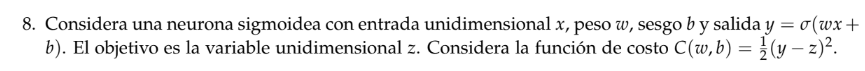

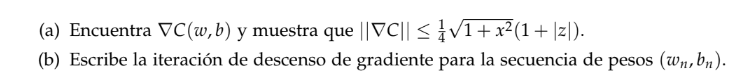

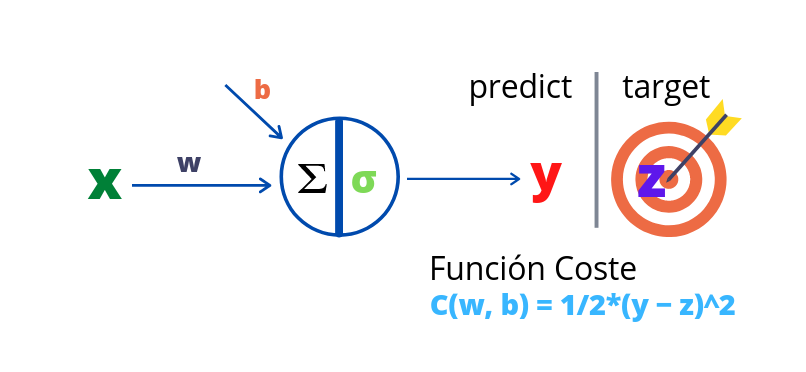

## **item a)**

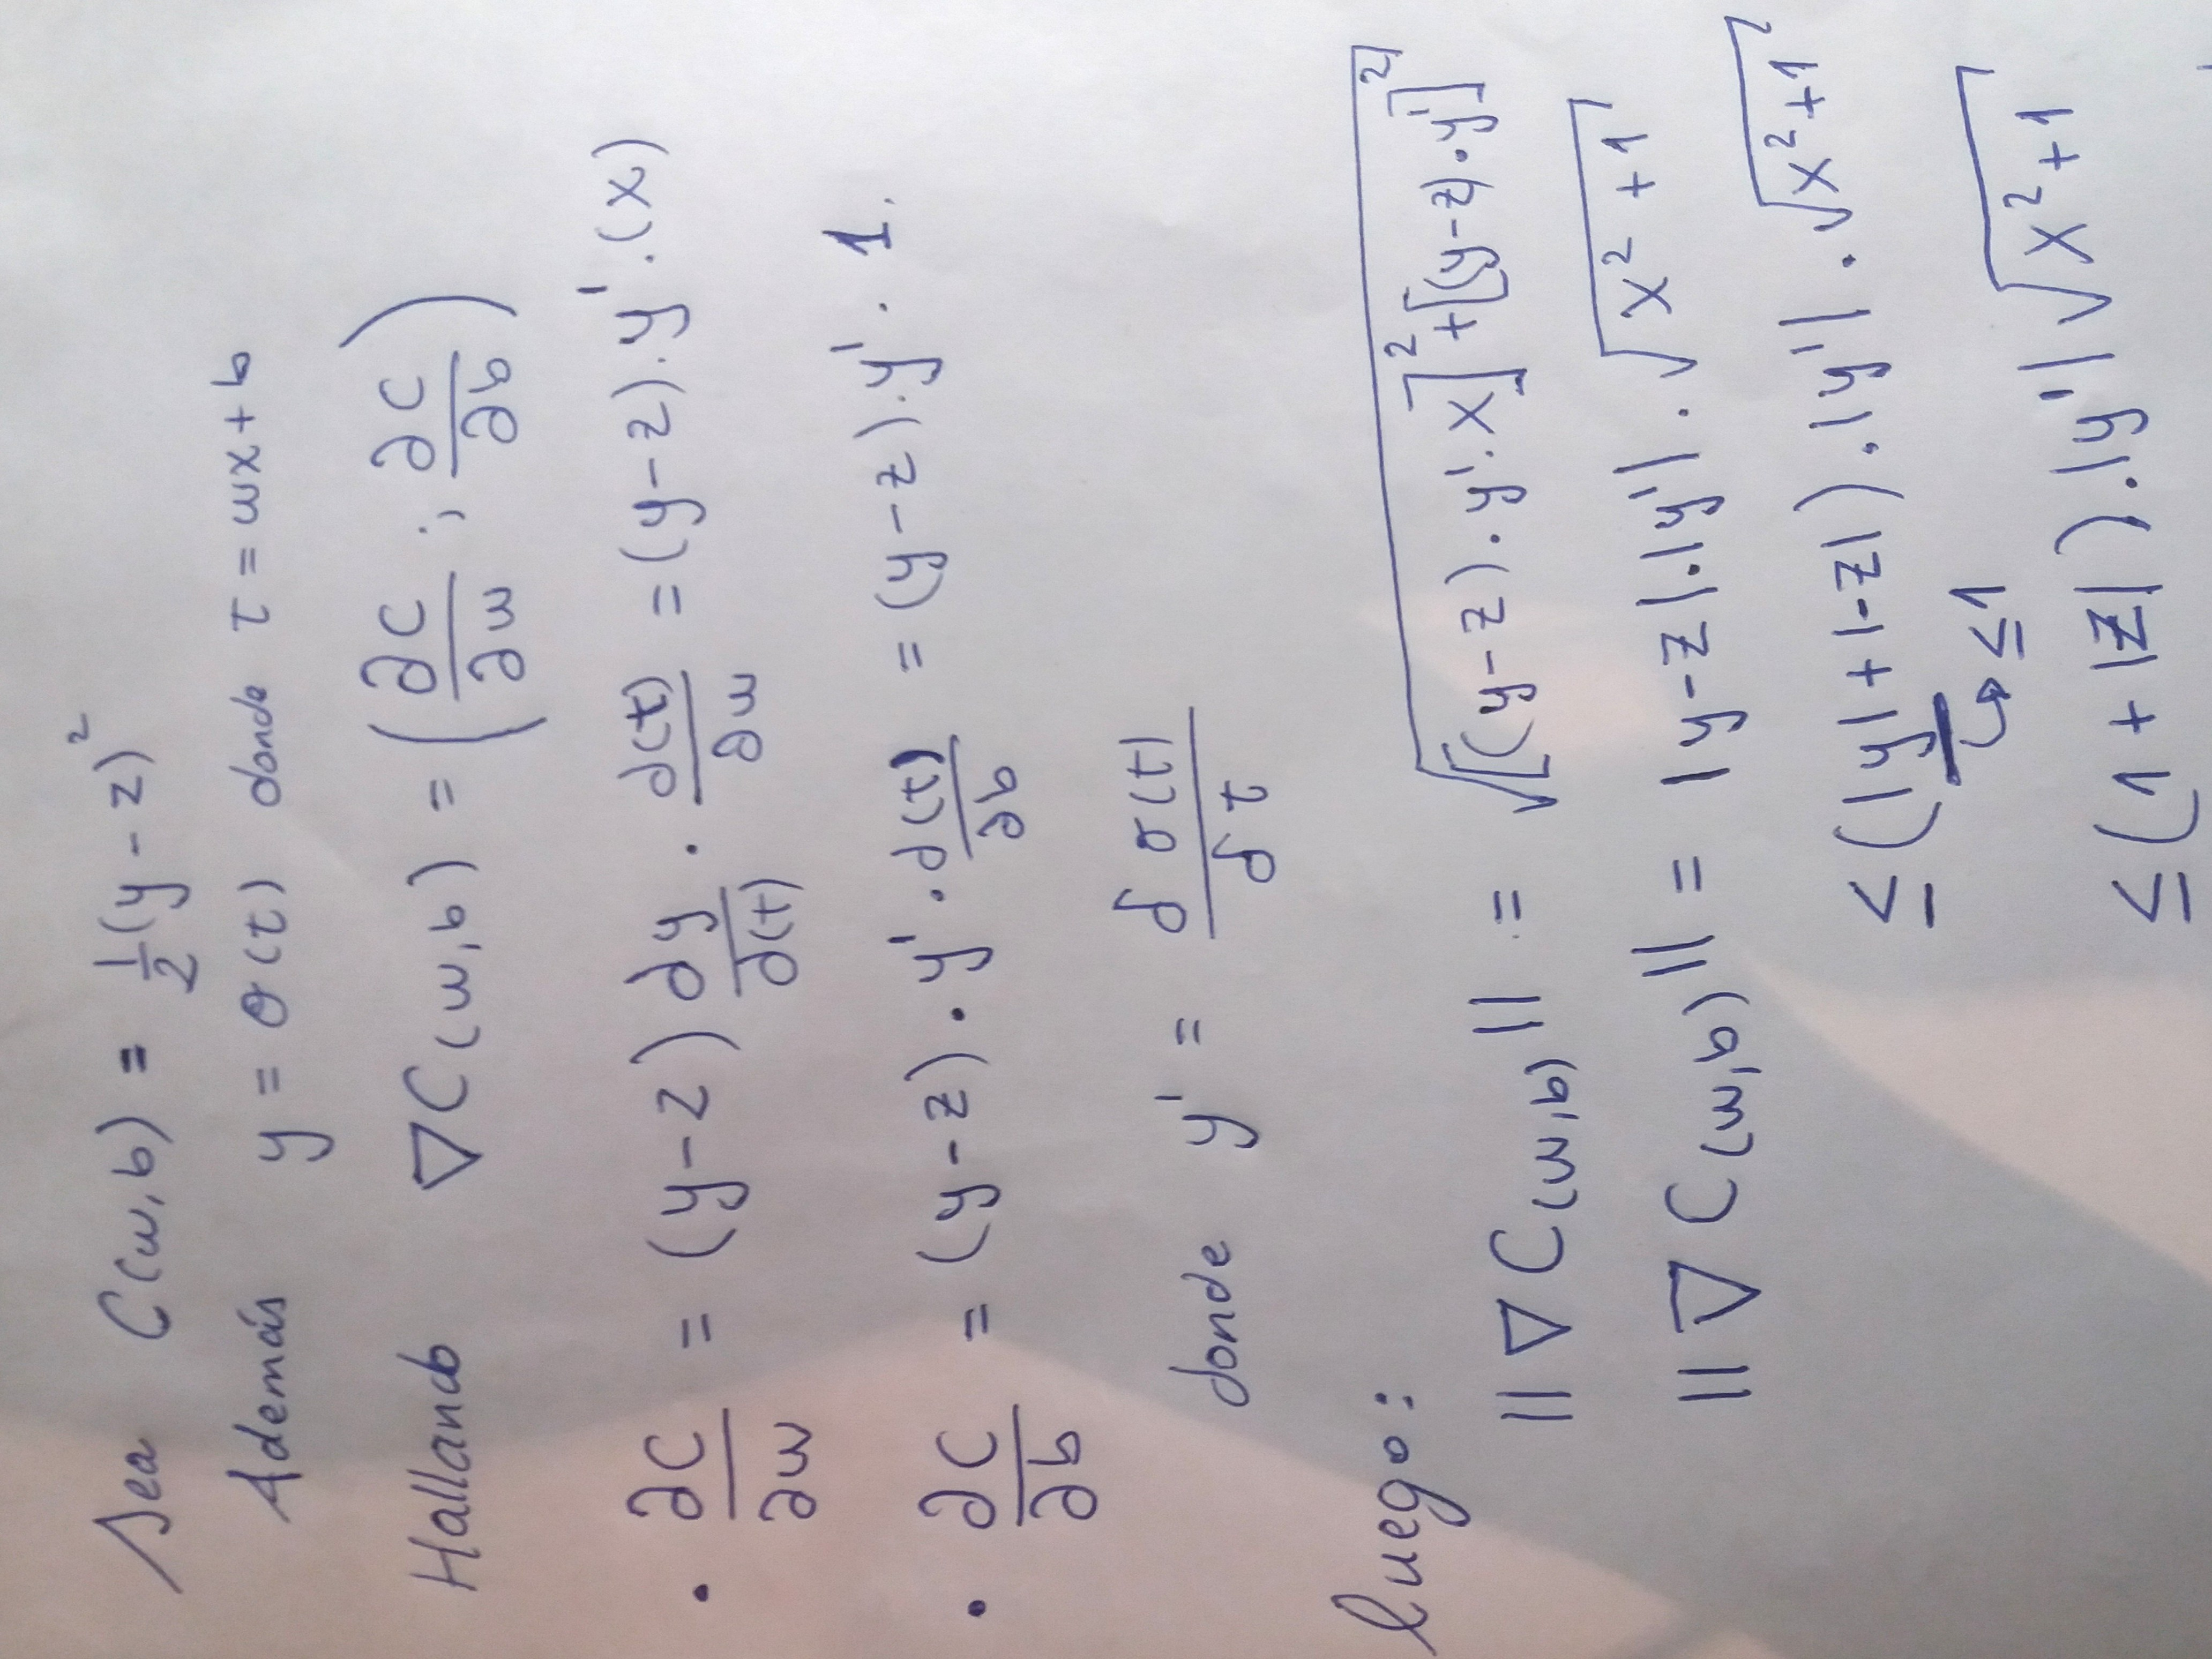

### **Veamos la forma de la derivada de la sigmoide:**

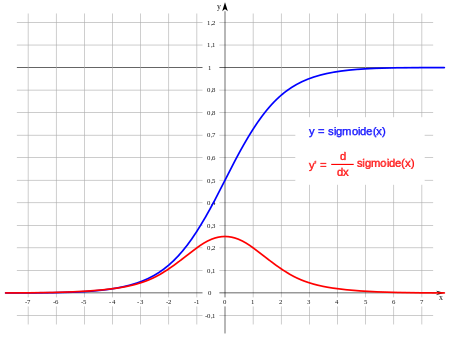

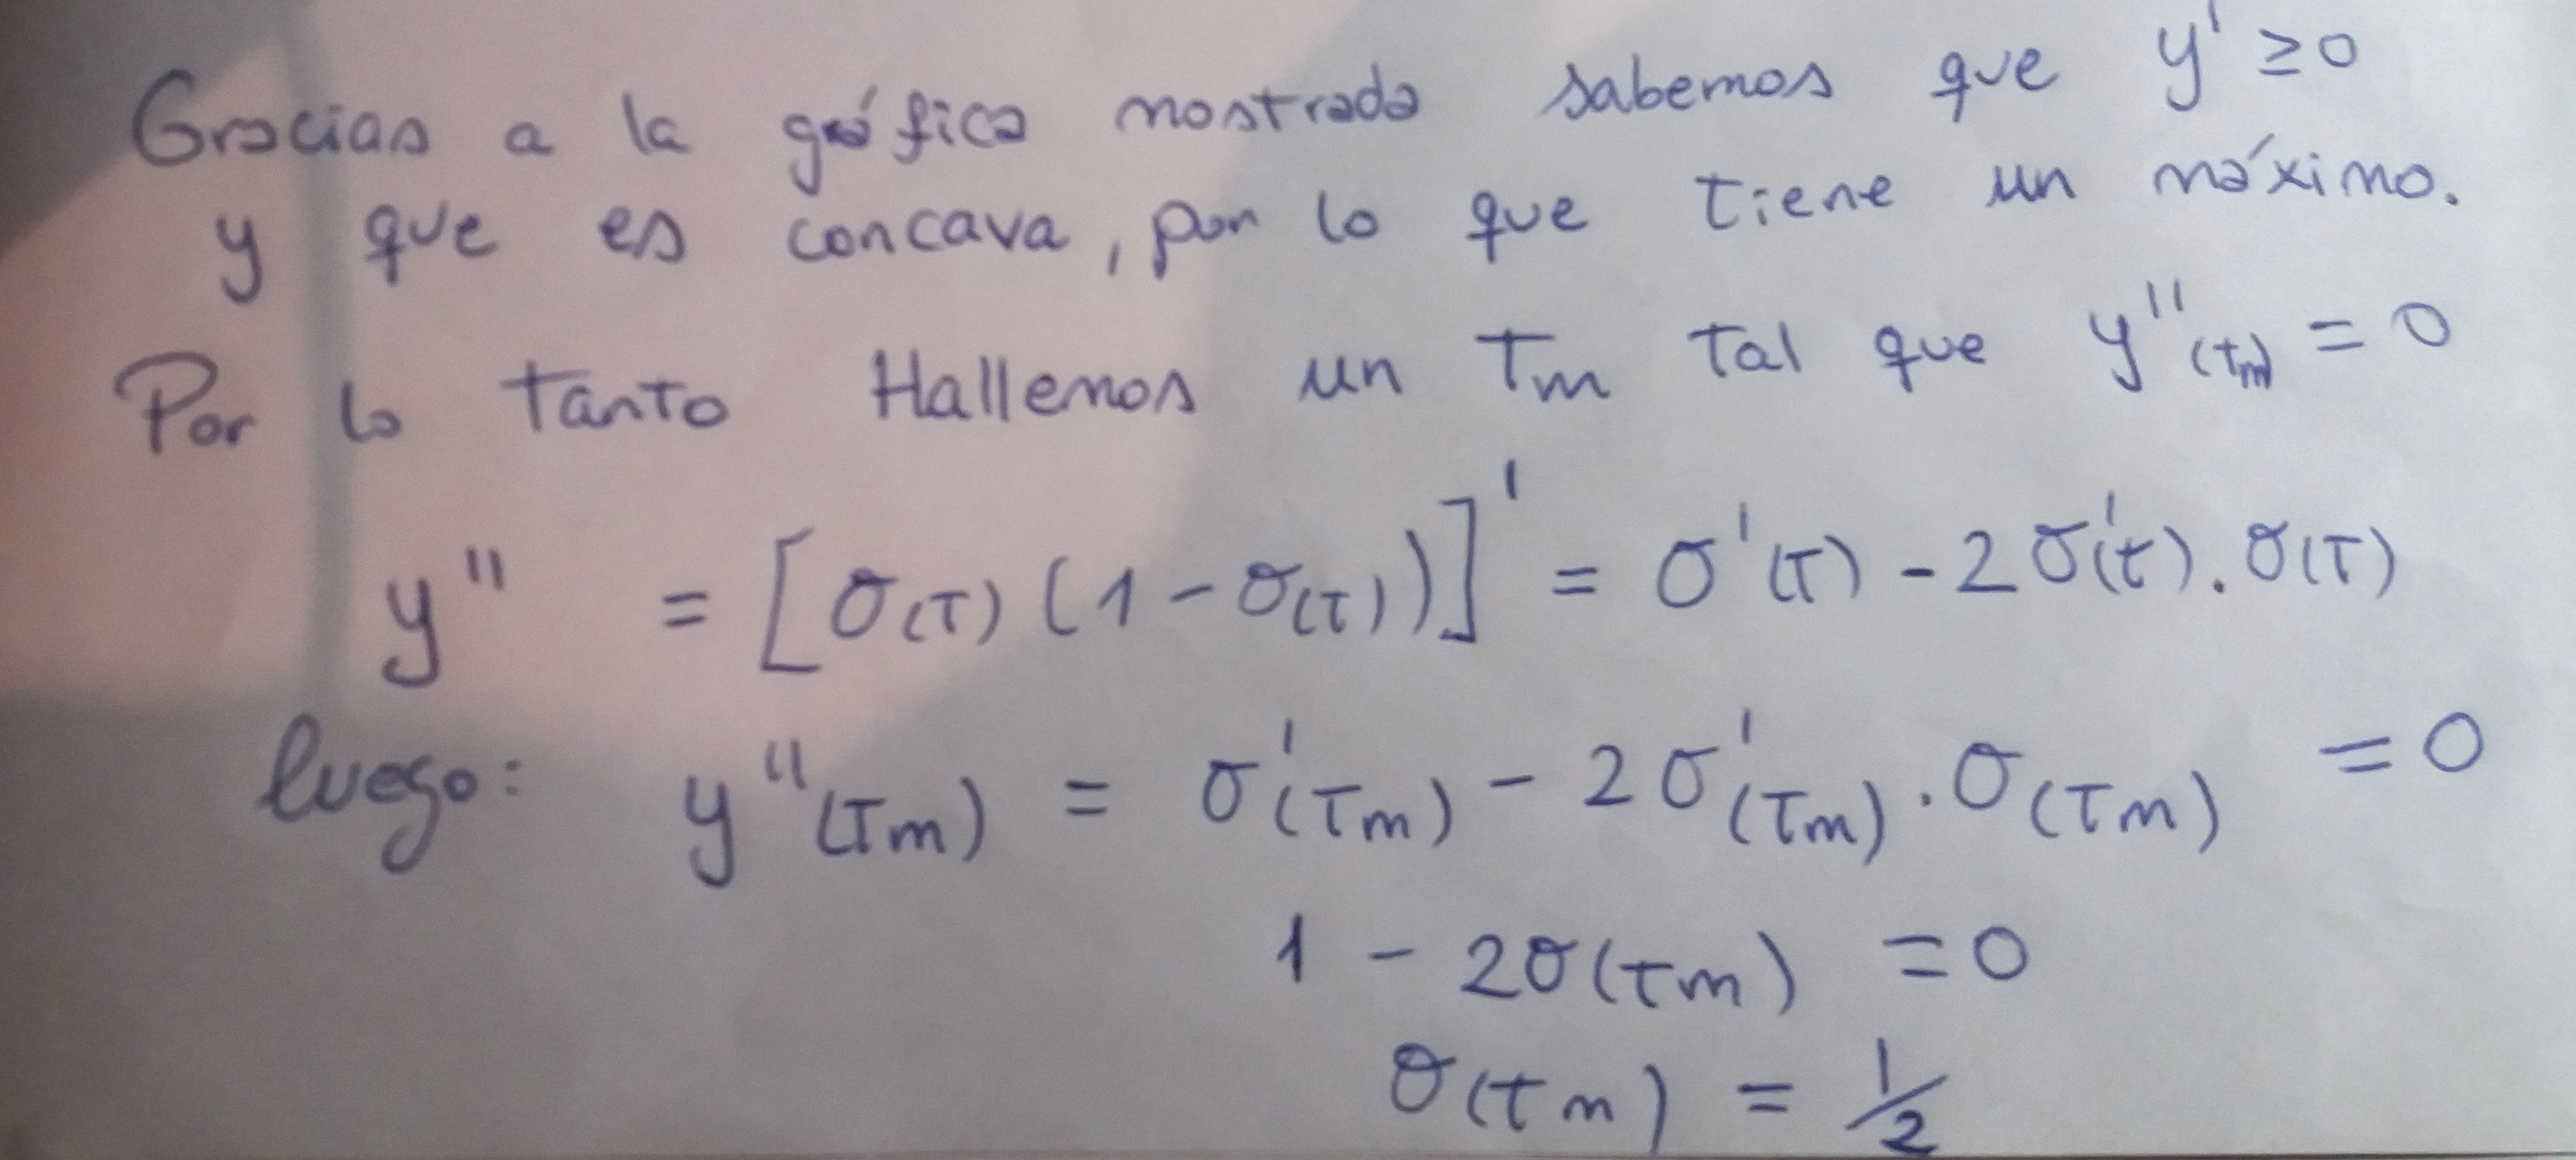

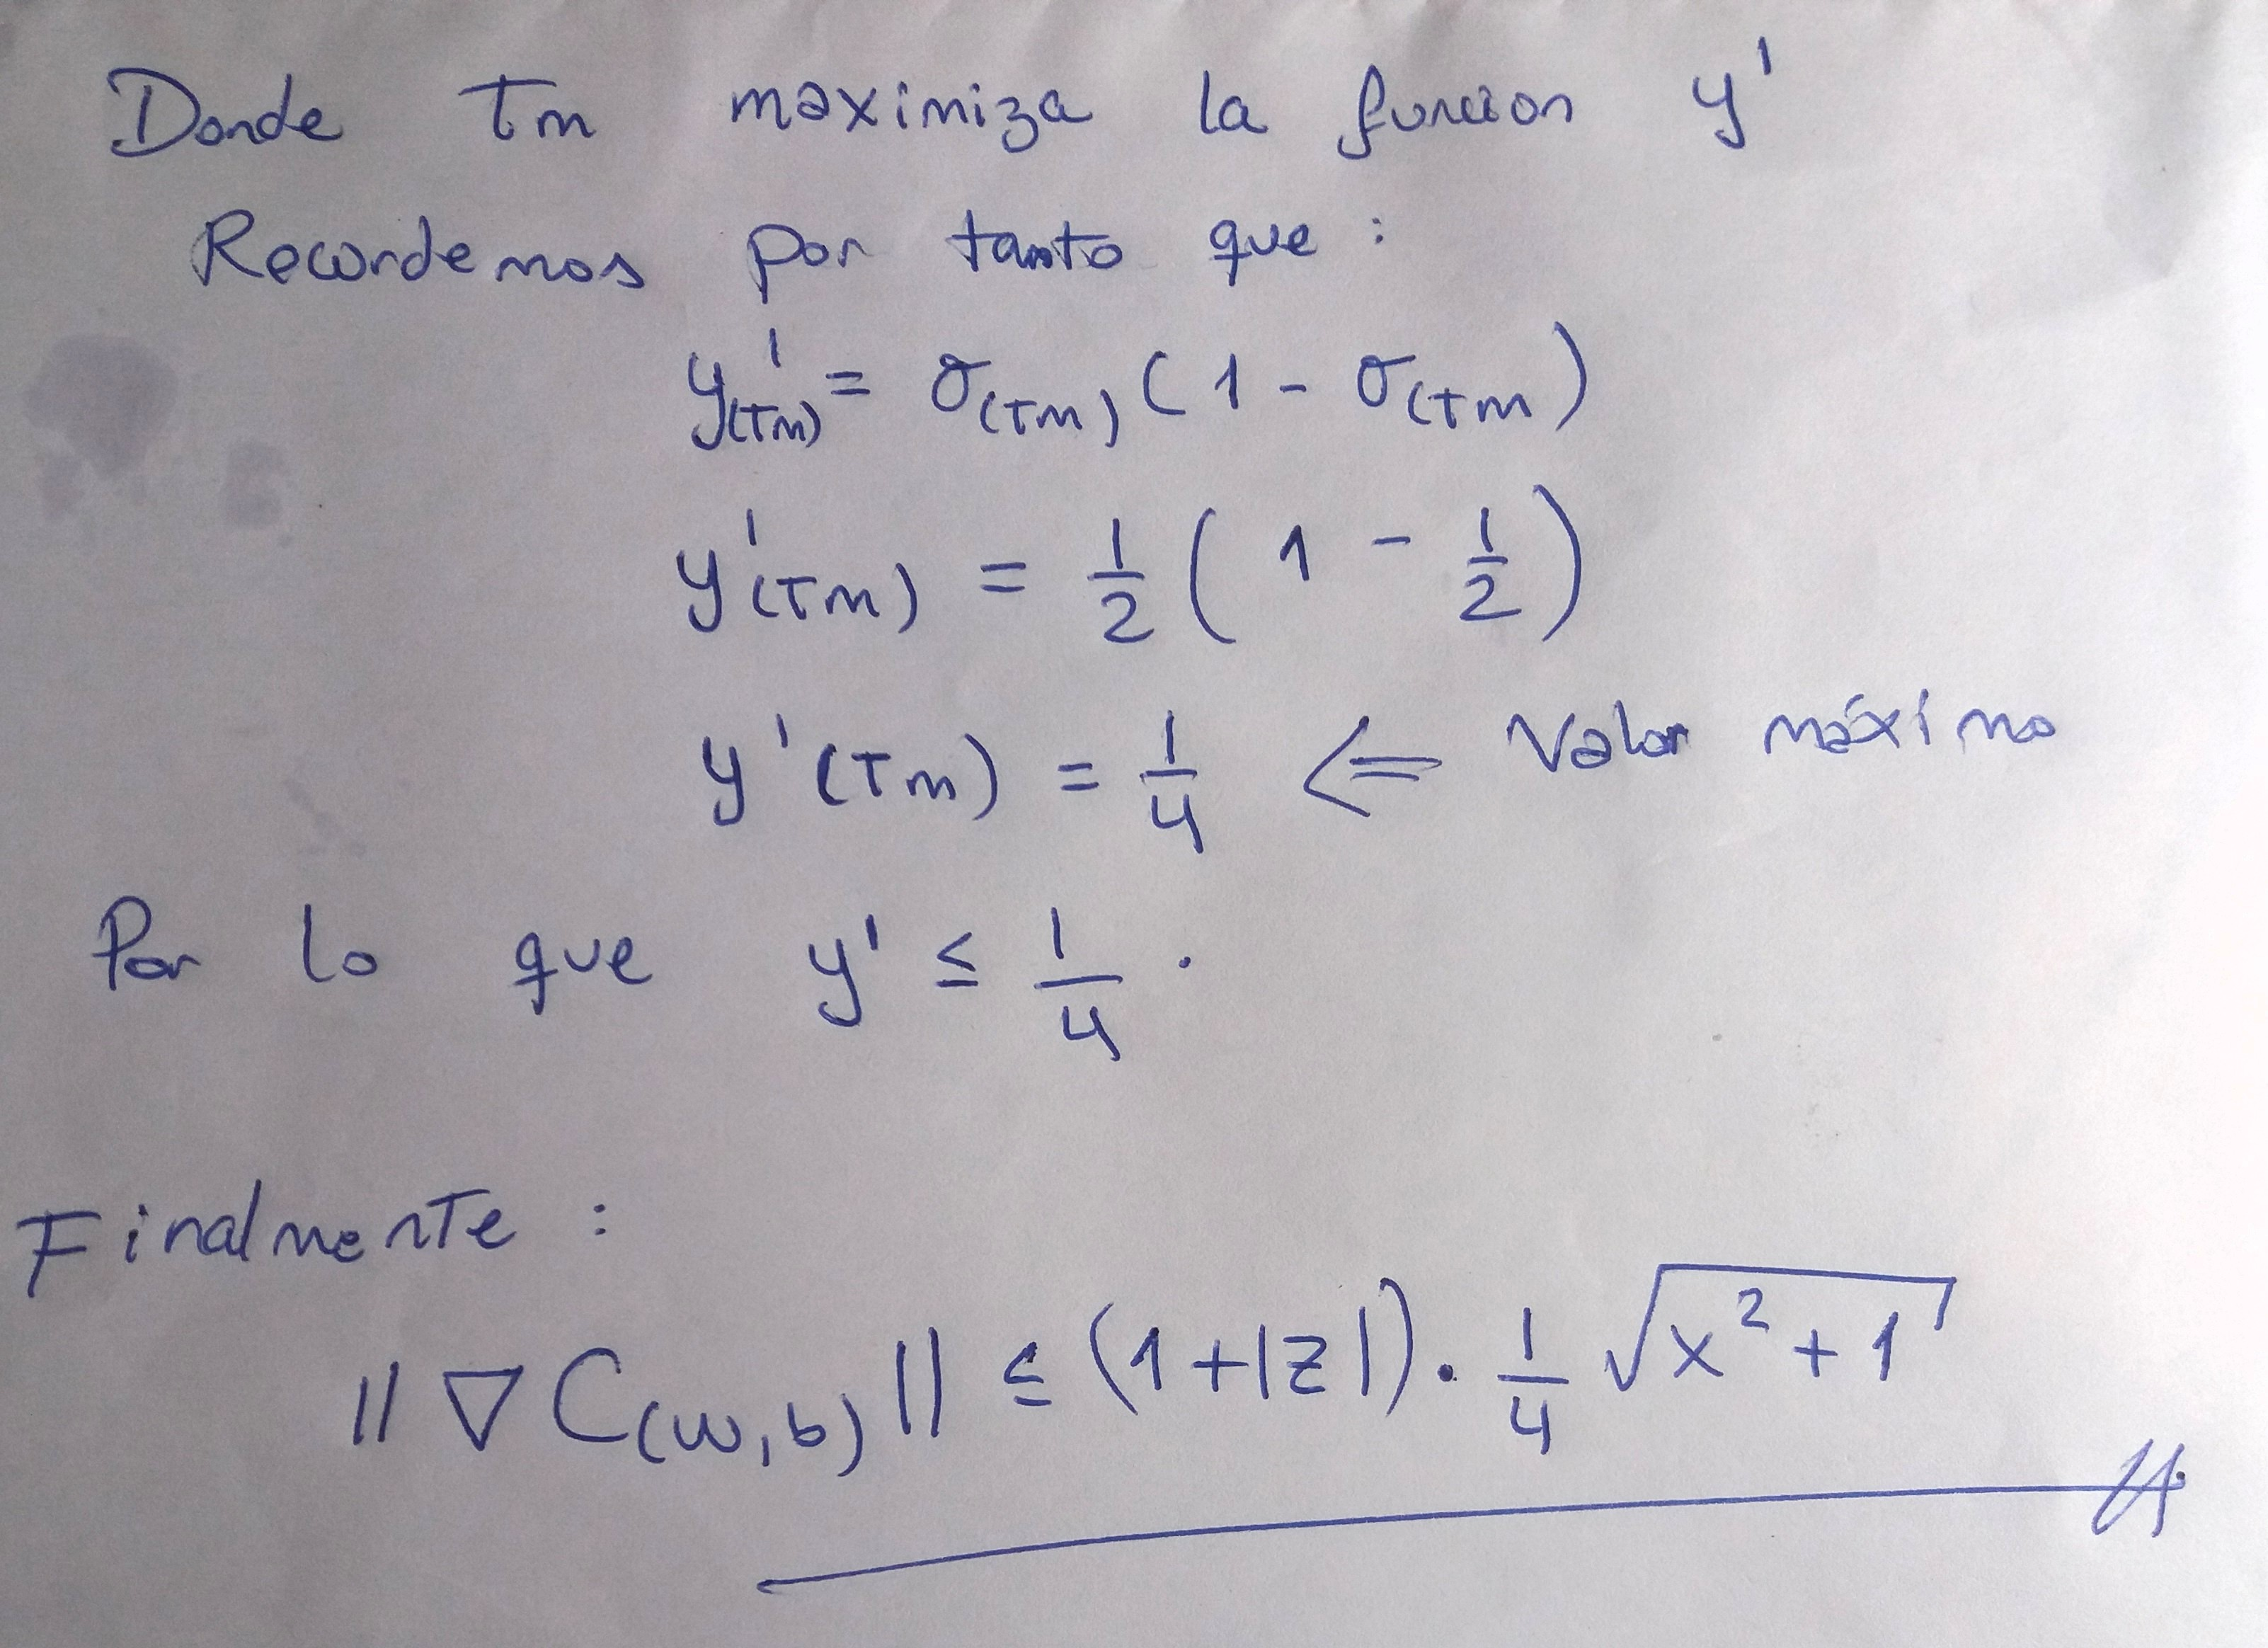

## **item b) Descenso de gradiente**

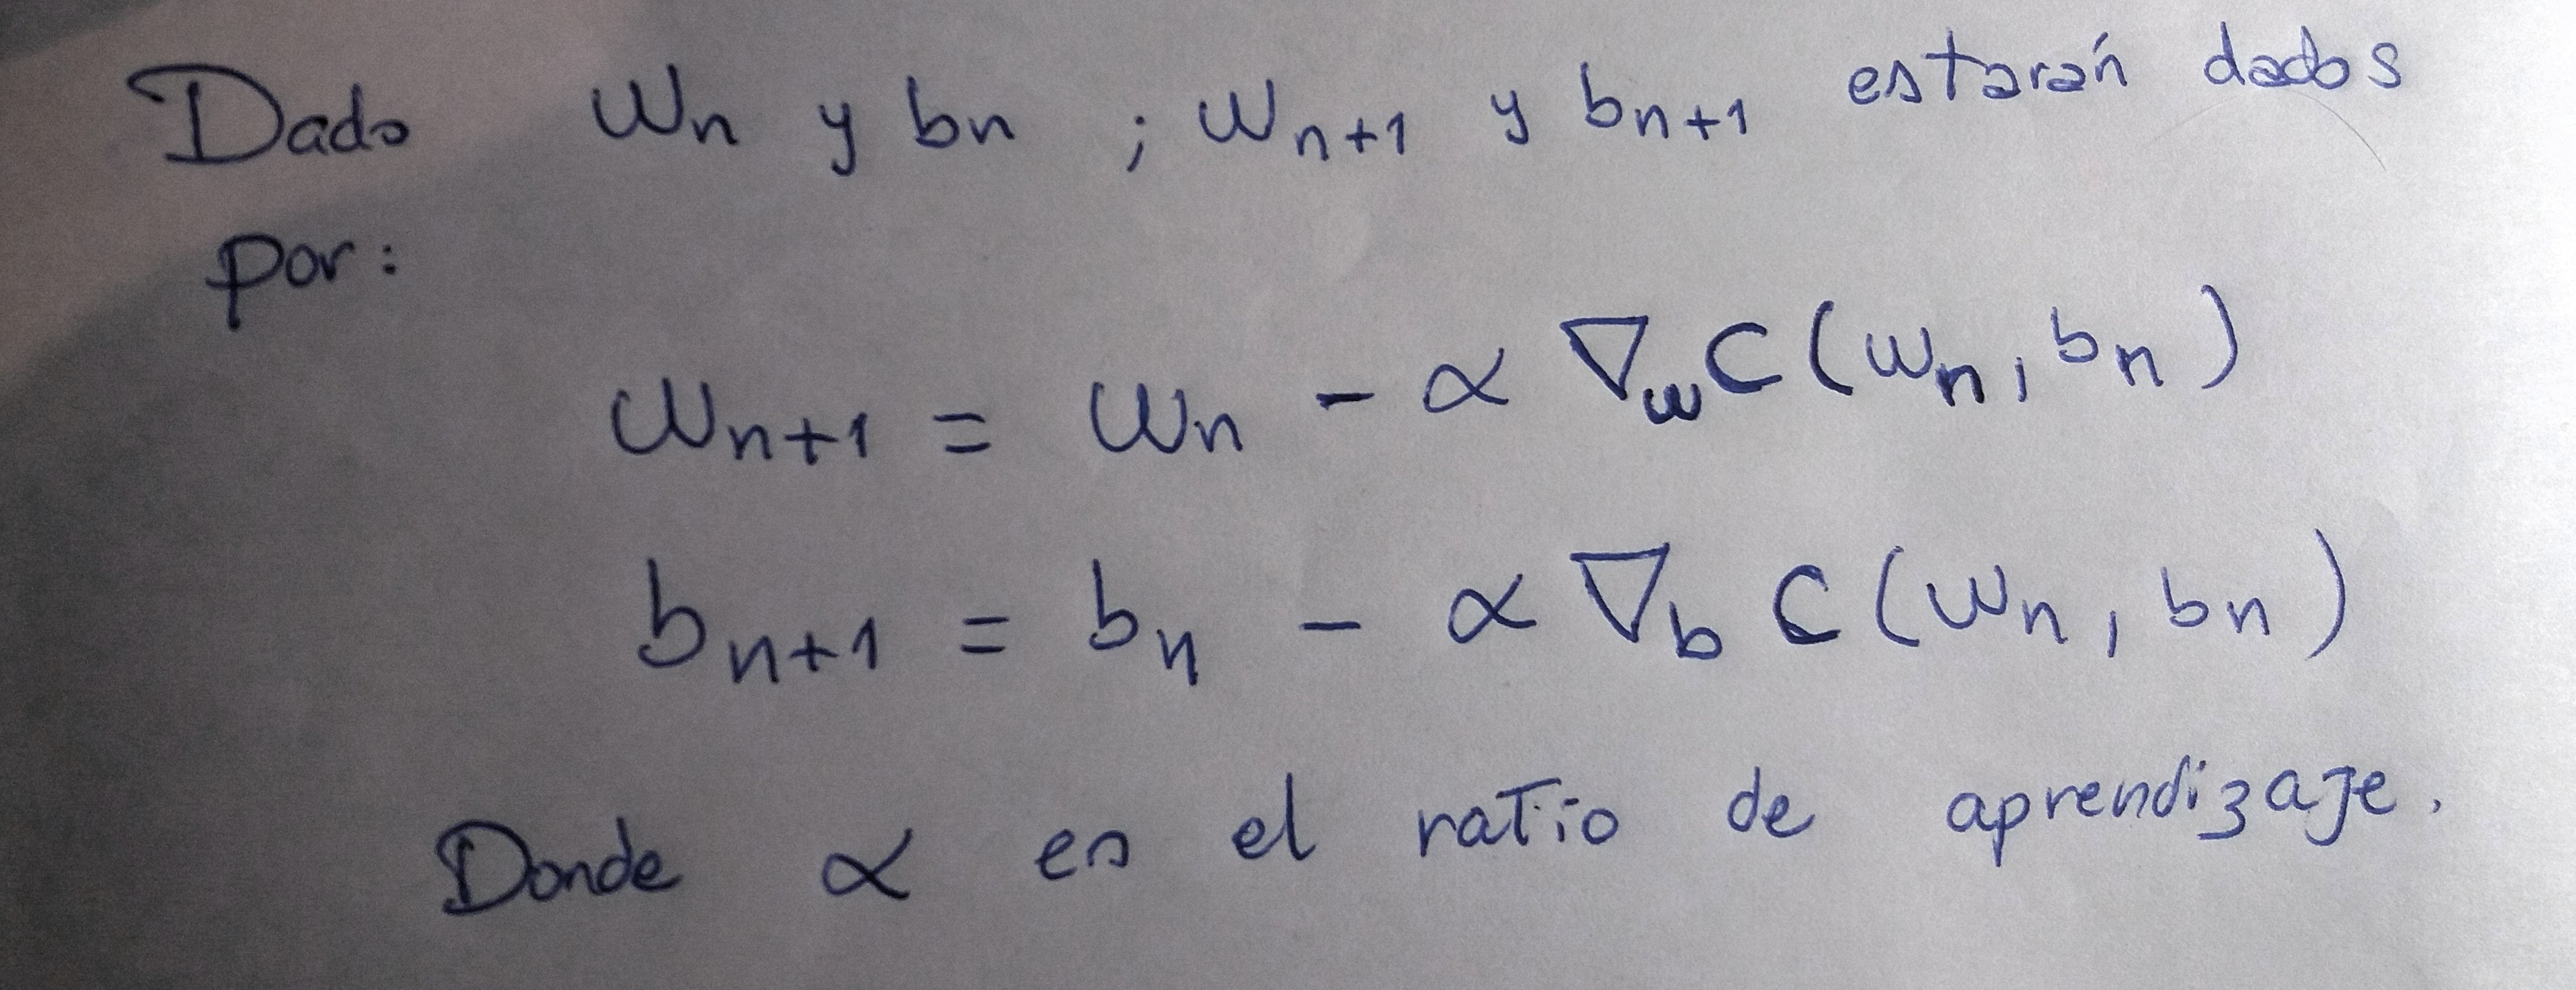